# SVM

In [26]:
import pickle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from helpers import plot_confusion_matrices

In [27]:
# File paths for the pickle files
x_train_path = 'data/X_train.pkl'
x_test_path = 'data/X_test.pkl'
y_train_path = 'data/y_train.pkl'
y_test_path = 'data/y_test.pkl'

# Reading the pickle files
with open(x_train_path, 'rb') as file:
    X_train = pickle.load(file)

with open(x_test_path, 'rb') as file:
    X_test = pickle.load(file)

with open(y_train_path, 'rb') as file:
    y_train = pickle.load(file)

with open(y_test_path, 'rb') as file:
    y_test = pickle.load(file)

In [28]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(type(X_train))

<class 'numpy.ndarray'>


In [29]:
print(X_train.to_numpy())
print(type(X_train.to_numpy()[0]))

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [30]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy:{accuracy:>10.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy:     0.959

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



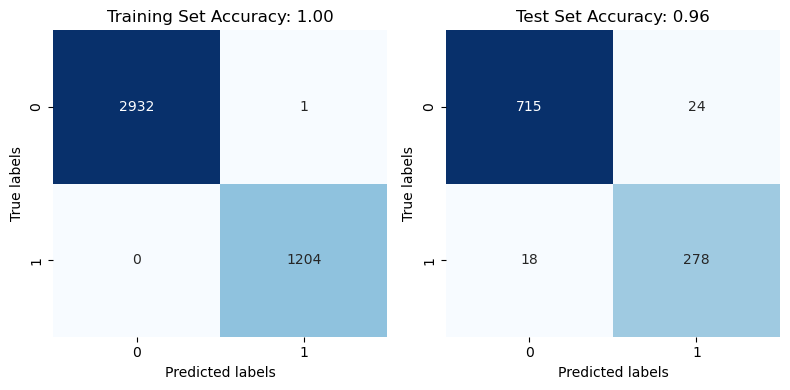

In [31]:
y_pred_train = svm_model.predict(X_train)

plot_confusion_matrices(y_train, y_pred_train, y_test, y_pred_test)

Self-generated emails

In [34]:
external_test_path = 'data/external_test.pkl'
with open(external_test_path, 'rb') as file:
    ex_test = pickle.load(file)

y_pred_ex_test = svm_model.predict(ex_test)
print(y_pred_ex_test)
#output : [0 0 0] = all three emails classified as non-spam even the obvious spam.

[0 0 0]
